In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import time

In [14]:
# Load the data from the CSV file
data = pd.read_csv('updated_filtered_zhvi_price_data.csv')

# Set "RegionFullName" as the index
data.set_index('RegionFullName', inplace=True)

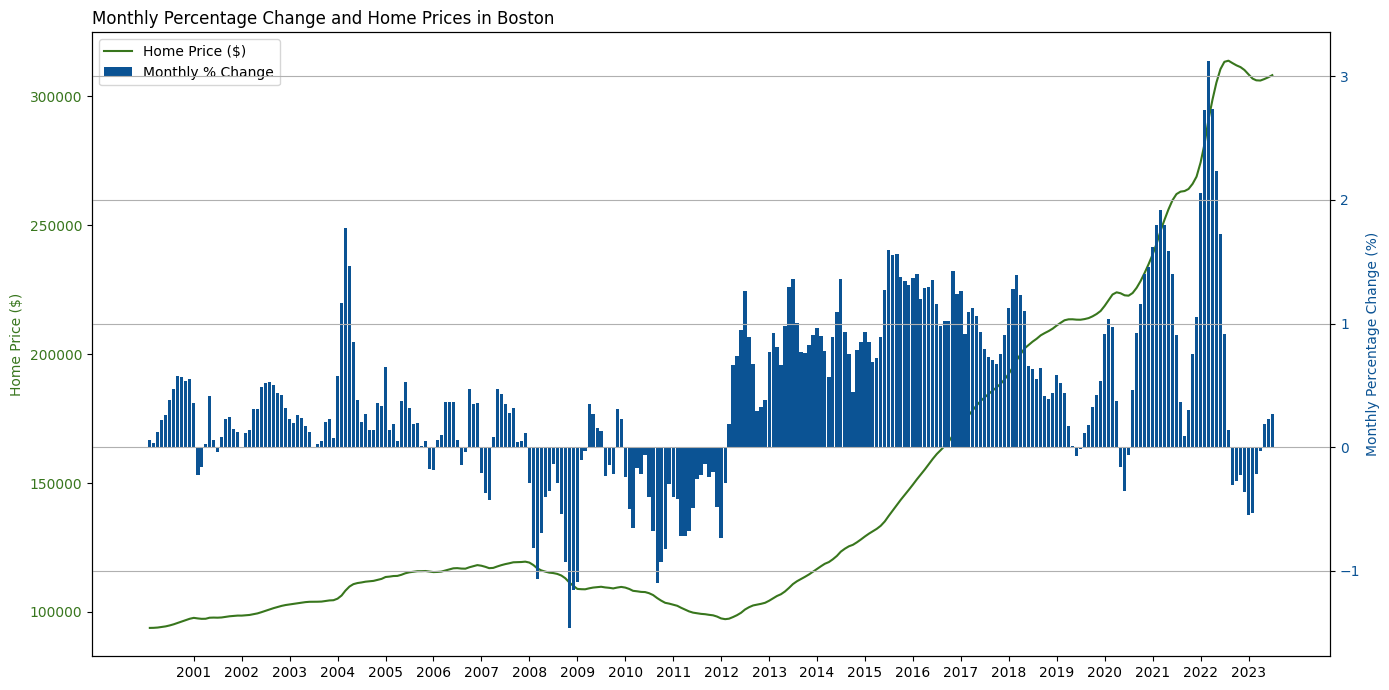

In [15]:

# Assuming you've already loaded your data and selected the selection region
city_data = data[data['RegionName'] == 'Dallas'].iloc[0]
prices = pd.to_numeric(city_data[8:-1])  # Assuming home prices start from the 9th column
monthly_pct_change = prices.pct_change(1) * 100  # Calculate percentage change monthly

# Adjust the dates to skip the first month
dates = pd.to_datetime(boston_data.index[8:-1])[1:].to_period('M')

# Initialize the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Normally, ax1 would be for % change and ax2 for prices.
# We are switching them here so ax1 will be for home prices.
color_price = '#38761d'  # A darker shade of green
ax1.plot(dates.to_timestamp(), prices[1:], color=color_price, label='Home Price ($)')
ax1.set_ylabel('Home Price ($)', color=color_price)
ax1.tick_params(axis='y', labelcolor=color_price)

# Create a secondary y-axis for monthly percentage change now
ax2 = ax1.twinx()
color_pct = '#0b5394'  # A darker shade of blue
ax2.bar(dates.to_timestamp(), monthly_pct_change.dropna(), width=25, color=color_pct, label='Monthly % Change', align='center')
ax2.set_ylabel('Monthly Percentage Change (%)', color=color_pct)
ax2.tick_params(axis='y', labelcolor=color_pct)

# Set x-ticks to only display the first month of each year for clarity
ax2.set_xticks([date.to_timestamp() for date in dates if date.month == 1])
ax2.set_xticklabels([date.strftime('%Y') for date in dates if date.month == 1], rotation=45)

# Add a title and grid
plt.title('Monthly Percentage Change and Home Prices in Boston', loc='left')  # Title anchored to the left
plt.grid(True)

# Adding a legend that combines both plots but with inverted labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()
plt.show()


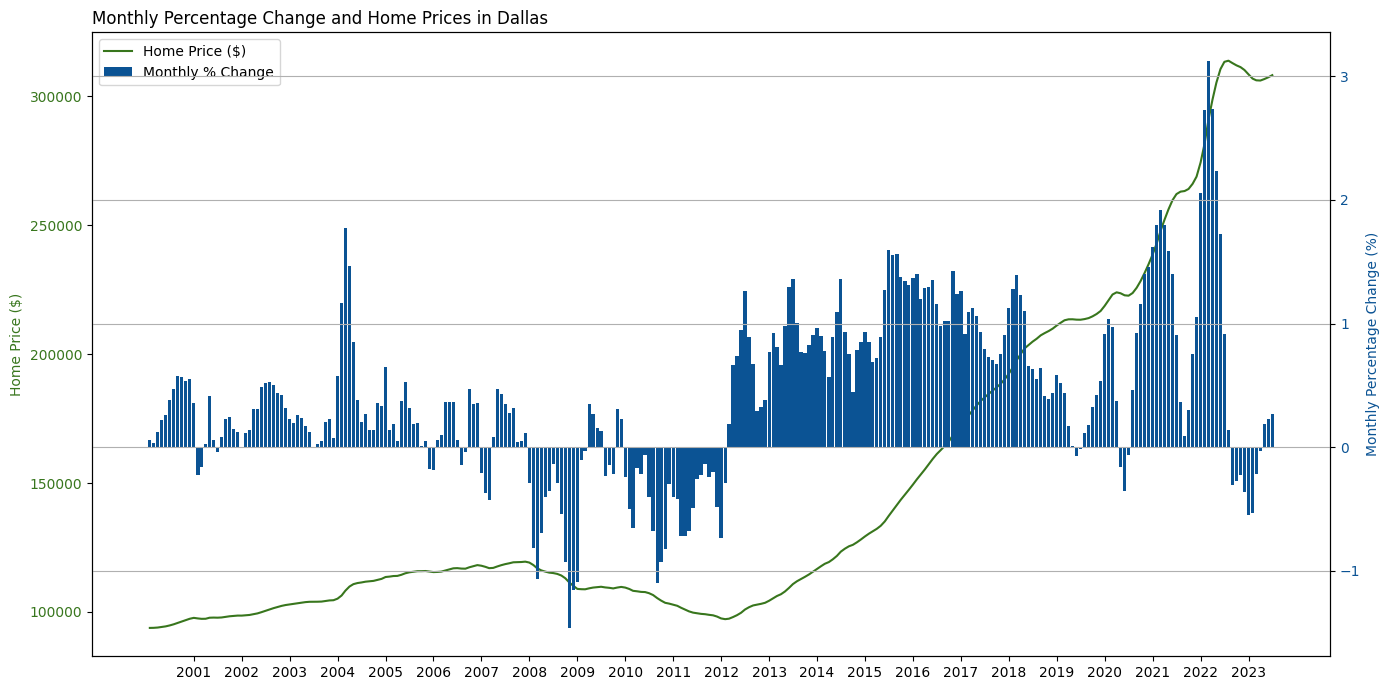

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded your data and selected the city region
city = 'Dallas'  # Set the city name dynamically
city_data = data[data['RegionName'] == city].iloc[0]
prices = pd.to_numeric(city_data[8:-1])  # Assuming home prices start from the 9th column
monthly_pct_change = prices.pct_change(1) * 100  # Calculate percentage change monthly

# Adjust the dates to skip the first month
dates = pd.to_datetime(city_data.index[8:-1])[1:].to_period('M')

# Initialize the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Normally, ax1 would be for % change and ax2 for prices.
# We are switching them here so ax1 will be for home prices.
color_price = '#38761d'  # A darker shade of green
ax1.plot(dates.to_timestamp(), prices[1:], color=color_price, label='Home Price ($)')
ax1.set_ylabel('Home Price ($)', color=color_price)
ax1.tick_params(axis='y', labelcolor=color_price)

# Create a secondary y-axis for monthly percentage change now
ax2 = ax1.twinx()
color_pct = '#0b5394'  # A darker shade of blue
ax2.bar(dates.to_timestamp(), monthly_pct_change.dropna(), width=25, color=color_pct, label='Monthly % Change', align='center')
ax2.set_ylabel('Monthly Percentage Change (%)', color=color_pct)
ax2.tick_params(axis='y', labelcolor=color_pct)

# Set x-ticks to only display the first month of each year for clarity
ax2.set_xticks([date.to_timestamp() for date in dates if date.month == 1])
ax2.set_xticklabels([date.strftime('%Y') for date in dates if date.month == 1], rotation=45)

# Add a title and grid, making the title dynamic to the city name
plt.title(f'Monthly Percentage Change and Home Prices in {city}', loc='left')  # Title anchored to the left
plt.grid(True)

# Adding a legend that combines both plots but with inverted labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()
plt.show()


Enter the city name:  East Moriches
Enter the state abbreviation (e.g., TX for Texas):  NY


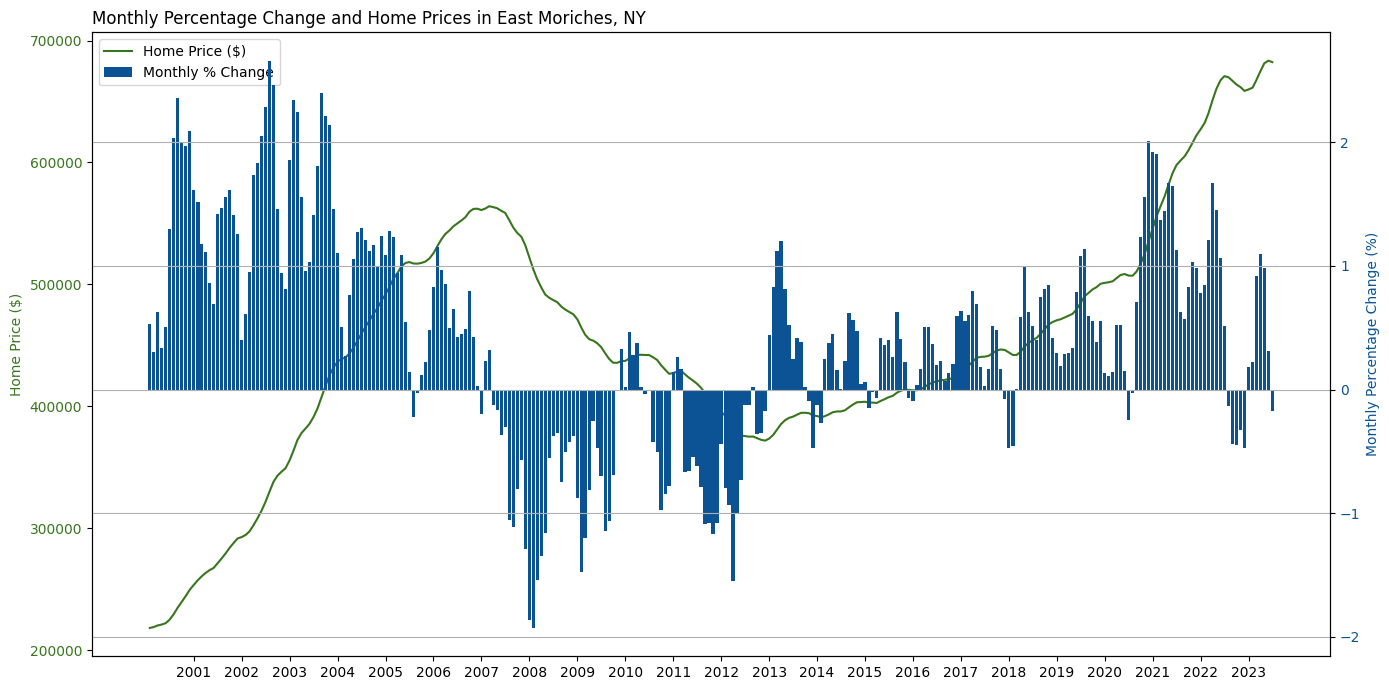

In [22]:


# Prompt the user to input the city and state
city = input("Enter the city name: ")
state = input("Enter the state abbreviation (e.g., TX for Texas): ")

# Filter data based on both city and state
city_data = data[(data['RegionName'] == city) & (data['State'] == state)].iloc[0]
prices = pd.to_numeric(city_data[8:-1])  # Assuming home prices start from the 9th column
monthly_pct_change = prices.pct_change(1) * 100  # Calculate percentage change monthly

# Adjust the dates to skip the first month
dates = pd.to_datetime(city_data.index[8:-1])[1:].to_period('M')

# Initialize the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Set up the plot for home prices
color_price = '#38761d'  # A darker shade of green
ax1.plot(dates.to_timestamp(), prices[1:], color=color_price, label='Home Price ($)')
ax1.set_ylabel('Home Price ($)', color=color_price)
ax1.tick_params(axis='y', labelcolor=color_price)

# Create a secondary y-axis for monthly percentage change
ax2 = ax1.twinx()
color_pct = '#0b5394'  # A darker shade of blue
ax2.bar(dates.to_timestamp(), monthly_pct_change.dropna(), width=25, color=color_pct, label='Monthly % Change', align='center')
ax2.set_ylabel('Monthly Percentage Change (%)', color=color_pct)
ax2.tick_params(axis='y', labelcolor=color_pct)

# Set x-ticks to only display the first month of each year for clarity
ax2.set_xticks([date.to_timestamp() for date in dates if date.month == 1])
ax2.set_xticklabels([date.strftime('%Y') for date in dates if date.month == 1], rotation=45)

# Add a title and grid, making the title dynamic to the city and state name
plt.title(f'Monthly Percentage Change and Home Prices in {city}, {state}', loc='left')  # Title anchored to the left
plt.grid(True)

# Adding a legend that combines both plots but with inverted labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()
plt.show()

